# Assignment 2
This is due by 5pm on Friday 21st February. The mark breakdown is:

- Q0 [1 marks]
- Q1 [10 marks]
- Q2 [10 marks]
- Q3 [9 marks]

It is adviseable that you tidy up your notebook before submitting the final version. Also, remember to add comments to your code.

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 14})
#plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["figure.figsize"] = (10,6)

# Question 1: Bisection method

### Q. 1a
Define a function for the quintic $f(x) = x^5+12 x^4-15 x^3-386 x^2-180 x+1800$ and plot it in the range $x=-11\dots6$

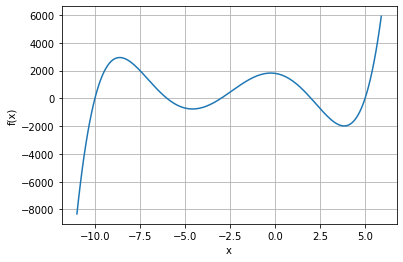

In [4]:
def f(x):
    result = x**5+12*x**4-15*x**3-386*x**2-180*x+1800
    return result

x_1 = np.arange(-11, 6, 0.1)
y_1 = f(x_1)
plt.plot(x_1,y_1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

### Q. 1b
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.

In [5]:
a = -11
b = -8
print(f(a),f(b))

-8320 2600


Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [6]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [7]:
FindRootBisection(f, a, b, 10**-12)

-10.000000000000227

### Q. 1c
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that: 
 - **also** works when $f(a) > 0 > f(b)$. 
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "Cannot use bisection method as sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values
 
Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = 2.5$ and $x=6$
 - attempting to find a root between $x=6$ and $x=8$ (there is no root in this region)

In [8]:
def FindRootBisectionImproved(f, a, b, tol, printSteps=False):
    left = a
    right = b 
    if (f(a)/f(b) >0):
        return "Cannot use bisection method as sign(f({0}))=sign(f({1}))".format(a,b)
    if (f(a)>f(b)):
        right = a
        left = b
    while (np.abs(right-left) > tol):
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

print(FindRootBisectionImproved(f, 2.5, 6, 10**-12))

print(FindRootBisectionImproved(f, 6, 8, 10**-12))

4.999999999999432
Cannot use bisection method as sign(f(6))=sign(f(8))


# **Commit this question to your git repository and push the changes to GitHub**

## Question 2: Newton-Raphson method

### Q. 2a
 - Define a function $p(x) = \sinh^{-1} x$. Calculate its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-11$ and $x=6$. Label the plot axes and use a grid.

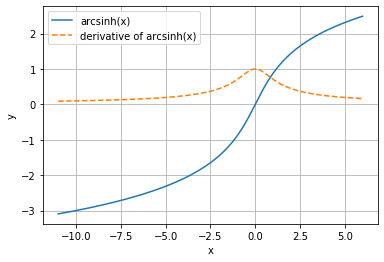

In [9]:
def p(x):
    result = np.arcsinh(x)
    return result

def dp(x):
    result = 1/(np.sqrt(1+x**2))
    return result

x_2 = np.arange(-11, 6, 0.01)
y_2 = p(x_2)
y_3 = dp(x_2)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_2, y_2)
plt.plot(x_2, y_3, linestyle = 'dashed')
plt.legend(["arcsinh(x)","derivative of arcsinh(x)"])
plt.show()

### Q. 2b
 - Starting with a value near the root use the below Newton-Raphson code to find the root

In [10]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps):
            print("x_%d = %.14lf" % (count, x0))
    return x0

In [11]:
FindRootNewtonRaphson(p, dp, 1, 10**-12, printSteps = True)

x_2 = -0.24645048028046
x_3 = 0.00487244381746
x_4 = -0.00000003855806
x_5 = 0.00000000000000
x_6 = 0.00000000000000


0.0

### Q. 2c
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) with labels and a grid

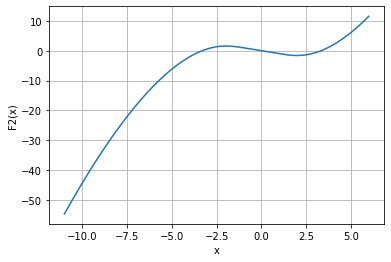

In [13]:
def F(x):
    result = x - p(x)/dp(x)
    return result
def F2(x):
    result = F(F(x))-x
    return result

y_4 = F2(x_2)
plt.plot(x_2, y_4)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("F2(x)")
plt.show()

- We want to find a root with $x \neq 0$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root of $F2(x)$ to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the vaue of the root of the variable 'x2' and also print(x2).
- Use the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and the algorithm does not converge.

In [12]:
x2 = FindRootBisectionImproved(F2, -5, -2.5, 10**-15)
print(x2)

-3.3198263863951487


In [13]:
FindRootNewtonRaphson(p, dp, x2, 10**-15, printSteps = True)

x_2 = 3.31982638639515
x_3 = -3.31982638639515
x_4 = 3.31982638639515
x_5 = -3.31982638639515
x_6 = 3.31982638639516
x_7 = -3.31982638639517
x_8 = 3.31982638639519
x_9 = -3.31982638639522
x_10 = 3.31982638639528
x_11 = -3.31982638639538
x_12 = 3.31982638639558
x_13 = -3.31982638639593
x_14 = 3.31982638639658
x_15 = -3.31982638639778
x_16 = 3.31982638639997
x_17 = -3.31982638640399
x_18 = 3.31982638641136
x_19 = -3.31982638642488
x_20 = 3.31982638644966


3.3198263864496607

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge?
 
In both cases set the final argument to 'True' to get the function to print the steps the method is taking

In [14]:
FindRootNewtonRaphson(p, dp, x2 + 10**-3, 10**-15, printSteps = True)
# Adding 10^-3 causes the function to converge.

x_2 = 3.31799291955419
x_3 = -3.31646503192368
x_4 = 3.31366473335724
x_5 = -3.30853432591229
x_6 = 3.29914150942784
x_7 = -3.28196707676465
x_8 = 3.25063825727745
x_9 = -3.19373767283563
x_10 = 3.09122130707552
x_11 = -2.90927347399647
x_12 = 2.59540431535339
x_13 = -2.08314783302632
x_14 = 1.33723662271008
x_15 = -0.50112317029319
x_16 = 0.03825335712855
x_17 = -0.00001864804651
x_18 = 0.00000000000000
x_19 = 0.00000000000000
x_20 = 0.00000000000000


0.0

In [15]:
FindRootNewtonRaphson(p, dp, x2 - 10**-3, 10**-15, printSteps = True)
# Taking 10^-3 away causes the function to diverge.

x_2 = 3.32166017534519
x_3 = -3.32318941448715
x_4 = 3.32599474945762
x_5 = -3.33114299306828
x_6 = 3.34059743357331
x_7 = -3.35798209341784
x_8 = 3.39002330308570
x_9 = -3.44932929068402
x_10 = 3.55995186656902
x_11 = -3.76918950842535
x_12 = 4.17488530024873
x_13 = -4.99611226215040
x_14 = 6.78235424035062
x_15 = -11.13059074592057
x_16 = 23.56748729018789
x_17 = -67.33071923403993
x_18 = 262.81601050239101
x_19 = -1383.63440312091529
x_20 = 9582.52377428959335


9582.523774289593

**Commit this question to your git repository and push the changes to GitHub**

## Question 3: Slow convergence of the Newton-Raphson method at repeated roots
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x-2)^2(x+1)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots3$

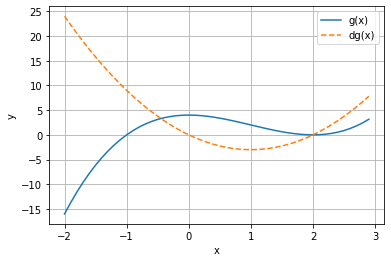

In [16]:
def g(x):
    result = ((x-2)**2)*(x+1)
    return result

def dg(x):
    result = 3*(x-2)*x
    return result

x_3 = np.arange(-2, 3, 0.1)
y_5 = g(x_3)
y_6 = dg(x_3)
plt.plot(x_3, y_5)
plt.plot(x_3, y_6, linestyle = "dashed")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["g(x)","dg(x)"])
plt.show()

Run the FindRootNewtonRaphson function with the final (optional) argument set to True to see the steps the algorithm takes. Run it with:
 - the initial value of $x_0 = 3$
 - the initial value of $x_0 = -2$

In [17]:
FindRootNewtonRaphson(g, dg, 3, 10^-15, True)

x_2 = 2.55555555555556
x_3 = 2.29790660225443
x_4 = 2.15539019921377
x_5 = 2.07956221041436
x_6 = 2.04028843517102
x_7 = 2.02027680978673
x_8 = 2.01017232343142
x_9 = 2.00509474109328
x_10 = 2.00254952808283
x_11 = 2.00127530502624
x_12 = 2.00063778796033
x_13 = 2.00031892786715
x_14 = 2.00015947240847
x_15 = 2.00007973832335
x_16 = 2.00003986969151
x_17 = 2.00001993497822
x_18 = 2.00000996752222
x_19 = 2.00000498376939
x_20 = 2.00000249188677


2.000002491886766

In [18]:
FindRootNewtonRaphson(g, dg, -2, 10^-15, True)

x_2 = -1.33333333333333
x_3 = -1.05555555555556
x_4 = -1.00194931773879
x_5 = -1.00000252829797
x_6 = -1.00000000000426
x_7 = -1.00000000000000
x_8 = -1.00000000000000
x_9 = -1.00000000000000
x_10 = -1.00000000000000
x_11 = -1.00000000000000
x_12 = -1.00000000000000
x_13 = -1.00000000000000
x_14 = -1.00000000000000
x_15 = -1.00000000000000
x_16 = -1.00000000000000
x_17 = -1.00000000000000
x_18 = -1.00000000000000
x_19 = -1.00000000000000
x_20 = -1.00000000000000


-1.0

What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [19]:
# Our function converges to the repeated root, 2, much more slowly than it does to the root -1. 

In [20]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 3$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -2$. Assign the result to a different variable.

In [21]:
a1 = FindRootNewtonRaphsonSteps(g, dg, 3, 10**-15)
a2 = FindRootNewtonRaphsonSteps(g, dg, -2, 10**-15)

Plot the absolute difference between the steps and the root, i.e., $|x_n - x_*|$, on a log scale.

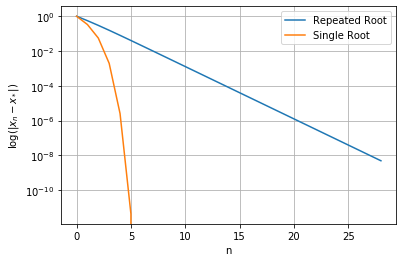

In [22]:
A1 = 2-a1
A2 = -1-a2

plt.yscale("log")
plt.plot(np.abs(A1))
plt.plot(np.abs(A2))
plt.xlabel("n")
plt.ylabel(r'$\mathrm{log}(|x_n-x_*|)$')
plt.legend(["Repeated Root","Single Root"])
plt.grid(True)
plt.show()

You should find the difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub**

## Submitting the assignment

Submit the assignment the same way you did with the first one.

To submit your assignment you should zip the ACM20030-Assignments folder. Rename the zip file ACM20030-Assignments2-STUDENTNUMBER.zip where STUDENTNUMBER is your student number. Upload the zip file to BrightSpace.